In [1]:
# Jupyter notebook for some of the computations for my final project

# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

In [2]:
# Grabbing datasets

signal_df = pd.read_csv("data\\cellular_network_analysis_dataset\\signal_metrics.csv") # I have already tested this data set and found it to be very random
network_df = pd.read_csv("data\\network_anomaly_dataset\\network_dataset_labeled.csv") # Currently examining

"\nThis doesn't look as random as some of the previous data that I looked at, which is a good sign. It has some noticable rises and falls, and perhaps\neven a semblance of periodicidy.\n"

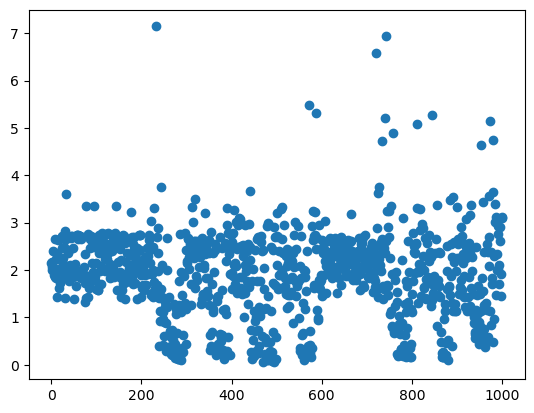

In [3]:
# Examining the dataset for randomness
plt.scatter(np.arange(len(network_df)), network_df["throughput"])
"""
This doesn't look as random as some of the previous data that I looked at, which is a good sign. It has some noticable rises and falls, and perhaps
even a semblance of periodicidy.
"""

In [4]:
df = network_df.drop("Video target", axis=1)
print(df.columns)
for col in df.columns:
    print(f'{col}: {np.unique(df[col])[:10]}')

"""
From this examination it looks like throughput, congestion, packet_loss, latency, and jitter are useful metrics for predicting future data.
We'll select this columns and graph them together and seperately to examine the initial relationships.
"""

Index(['timestamp', 'bandwidth', 'throughput', 'congestion', 'packet_loss',
       'latency', 'jitter', 'Routers', 'Planned route', 'Network measure',
       'Network target', 'Percentage video occupancy', 'Bitrate video',
       'Number videos', 'anomaly_throughput', 'anomaly_congestion',
       'anomaly_packet_loss', 'anomaly_latency', 'anomaly_jitter', 'anomaly'],
      dtype='object')
timestamp: ['2024-05-11 12:00:15' '2024-05-11 12:00:43' '2024-05-11 12:01:12'
 '2024-05-11 12:01:40' '2024-05-11 12:02:08' '2024-05-11 12:02:36'
 '2024-05-11 12:03:05' '2024-05-11 12:03:34' '2024-05-11 12:04:01'
 '2024-05-11 12:04:30']
bandwidth: [2]
throughput: [0.05 0.08 0.1  0.11 0.12 0.13 0.14 0.16 0.17 0.18]
congestion: [0.03 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13]
packet_loss: [ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20.  22.5]
latency: [4.48 4.58 4.72 4.78 4.86 4.95 4.97 4.99 5.02 5.04]
jitter: [0.   0.18 0.2  0.21 0.22 0.23 0.25 0.26 0.27 0.28]
Routers: ['up xrv1,2,3' 'up xrv6']
Planned 

"\nFrom this examination it looks like throughput, congestion, packet_loss, latency, and jitter are useful metrics for predicting future data.\nWe'll select this columns and graph them together and seperately to examine the initial relationships.\n"

In [5]:
# filtering out data points marked as anomalies
for x in ["_throughput", "_congestion", "_packet_loss", "_latency", "_jitter", ""]:
    df = df.loc[df["anomaly" + x] == 0]
    
print(len(df))

747


In [6]:
filtered_df = df.filter(items=["throughput", "congestion", "packet_loss", "latency", "jitter"], axis=1)
print(len(filtered_df))

747


In [7]:
print(filtered_df.head())

   throughput  congestion  packet_loss  latency  jitter
0        2.15        0.38          0.0     6.58    0.52
1        2.16        0.12          0.0     5.36    0.34
2        2.00        0.08          0.0     6.29    0.23
3        2.07        0.07          0.0     5.91    0.51
4        2.40        0.08          0.0     5.81    0.71


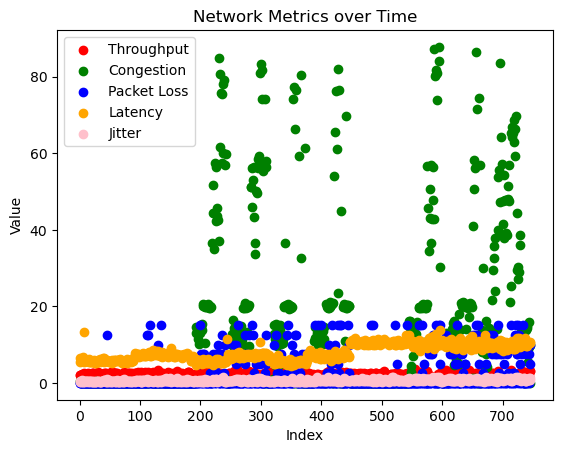

In [8]:
plt.scatter(np.arange(len(filtered_df)), filtered_df["throughput"], color="red", label="Throughput")
plt.scatter(np.arange(len(filtered_df)), filtered_df["congestion"], color="green", label="Congestion")
plt.scatter(np.arange(len(filtered_df)), filtered_df["packet_loss"], color="blue", label="Packet Loss")
plt.scatter(np.arange(len(filtered_df)), filtered_df["latency"], color="orange", label="Latency")
plt.scatter(np.arange(len(filtered_df)), filtered_df["jitter"], color="pink", label="Jitter")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Network Metrics over Time")
plt.legend()
plt.show()

"""
From this we can see that there is a pretty evident correlation between the data points
It would be nice to run a simple linear regression model first to determine this correlation,
using throughput as the dependent variable.
There really aren't that many data points though to test on.
""";

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Creating testing and training sets
X = np.array(filtered_df.filter(items=["congestion", "packet_loss", "latency", "jitter"], axis=1))
y = np.array(filtered_df["throughput"])

# Training basic model
model.fit(X, y)
print(model.score(X, y))
"""
From these results we can see that there is no strong correlation between the data points at each time step
This is note exactly decisive, because it could mean that the data is both difficult to predict but also independent,
meaning that we have access to more information.

Also, the score of the linear model increased after removing the anomalies from the dataset.
This is probably good news for the quality of the data and the identification of the outliers
"""

0.2600908797519631


'\nFrom these results we can see that there is no strong correlation between the data points at each time step\nThis is note exactly decisive, because it could mean that the data is both difficult to predict but also independent,\nmeaning that we have access to more information.\n\nAlso, the score of the linear model increased after removing the anomalies from the dataset.\nThis is probably good news for the quality of the data and the identification of the outliers\n'

Text(0, 0.5, 'Throughput at Time t + 1')

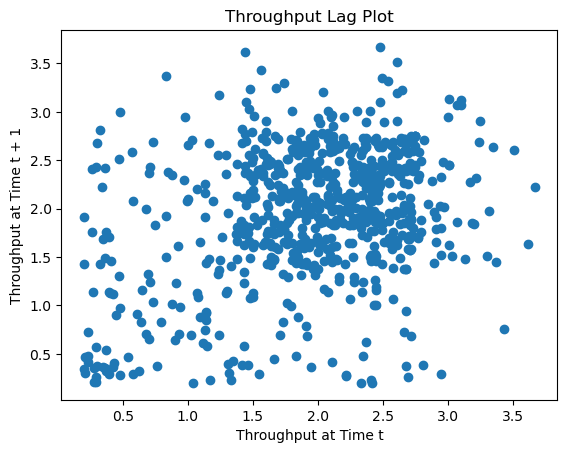

In [10]:
# Running some lag plots for various components of the dataset, primarily throughput

# The lag plot of network throughput is fairly random with a slight 
# The lag plot of congestion is pretty linear
# The lag plot of packet_loss is discrete and random
# The lag plot of latency is very linear and clumpy
# the lag plot of jitter is fairly random with a slight linear correlation

pd.plotting.lag_plot(filtered_df["throughput"], lag=1)
plt.title("Throughput Lag Plot")
plt.xlabel("Throughput at Time t")
plt.ylabel("Throughput at Time t + 1")
# pd.plotting.lag_plot(filtered_df["congestion"], lag=1)
# pd.plotting.lag_plot(filtered_df["packet_loss"], lag=1)
# pd.plotting.lag_plot(filtered_df["latency"], lag=1)
# pd.plotting.lag_plot(filtered_df["jitter"], lag=1)

In [11]:
from sklearn.model_selection import train_test_split

"""
The idea is to pass in a series of vectors of data of the form [throughput, congestion, packet_loss, latency, jitter] to successive layers of the 
neural network, with a buffer size of k. The network will have k + h layers, so k initial input layers and then at least one hidden layer to decrease
the dimensionality of the tensors to a single value of throughput. The k layers will take the data vector from each time step in in the previous k size
and use it to predict the next value of throughput. I am also going to split the data into a training and testing set by taking the last 20% of the data
for testing.
"""

# Redefining X and y from previous definition
X = np.array(filtered_df.filter(items=["throughput", "congestion", "packet_loss", "latency", "jitter"], axis=1))
y = np.array(filtered_df["throughput"])

# Make sure not to shuffle for time series
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, shuffle=False)
print(trainX.shape)
print(trainY.shape)

(597, 5)
(597,)


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.set_default_dtype(torch.float64)

In [13]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, k):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.k = k

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = []
        for i in range(k):
            self.h2h.append(nn.Linear(hidden_size, hidden_size))
        self.h2o = nn.Linear(hidden_size, output_size)

    def forward(self, input_data, hidden_data, idx):
        """
        Feeds the algorithm forward using the input data and the vector of previous data
        """
        hidden_data = F.relu(self.i2h(input_data) + self.h2h[idx](hidden_data))
        if idx == self.k - 1:
            return self.h2o(hidden_data)
        else:
            return hidden_data

    def init_hidden(self):
        """
        Returns the initial value of the previous hidden data
        """
        return torch.zeros(1, self.hidden_size, dtype=torch.float64)

In [14]:
# Making a RNN Object with the desired sizes
rnn = RNN(5, 5, 1, 10)
# This method takes the previous hidden layer, the input data from the specific time step, and outputs 
output = rnn(torch.zeros(1, 5), torch.zeros(1, 5), 0)
print(output)

tensor([[0.0918, 0.6074, 0.3617, 0.3688, 0.0000]], grad_fn=<ReluBackward0>)


In [15]:
# Running a complete cycle with some sample from the front of the test array
k = 6
rnn = RNN(5, 5, 1, k)
tensorX = torch.tensor(X, dtype=torch.float64).detach().clone()
tensorY = torch.tensor(y, dtype=torch.float64).detach().clone()

trainX, testX, trainY, testY = train_test_split(tensorX, tensorY, test_size=0.2, shuffle=False)

# Should return a single number output
output = rnn.init_hidden()
for i in range(k):
    output = rnn(trainX[i], output, i)

print(output.squeeze().item())

0.3756022921370317


In [16]:
# Series should be of shape (k, 5) throughput is a float, k is an int

# Hyperparameters

def train(series, throughput, k, criterion, learning_rate, rnn):
    # Initialize hidden data
    hidden = rnn.init_hidden()

    # Initialize gradient
    rnn.zero_grad()

    # Feed forward through the model
    for i in range(k):
        hidden = rnn(series[i], hidden, i)

    # Calculate loss and backpropogate
    loss = criterion(hidden.reshape(1), torch.tensor(throughput, dtype=torch.float64).reshape(1))
    loss.backward()

    # Update the parameters from the gradient descent
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return hidden, loss.item()

C:\Users\legoe\AppData\Local\Temp\ipykernel_7324\1998810907.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(hidden.reshape(1), torch.tensor(throughput, dtype=torch.float64).reshape(1))


'\nHurray! The loss plot looks pretty good, except that it starts to increase at about 50 iterations\nso, 50 iterations is probably a good stopping point for the algorithm\n[10, MSE, 0.005] -> 0.019 loss, Maybe I just got lucky with this?\n[10, MSE, 0.05] -> 242.2 loss (Very bad), learning rate may still be too high in the inital run\n[10, MSE, 0.001] -> \n'

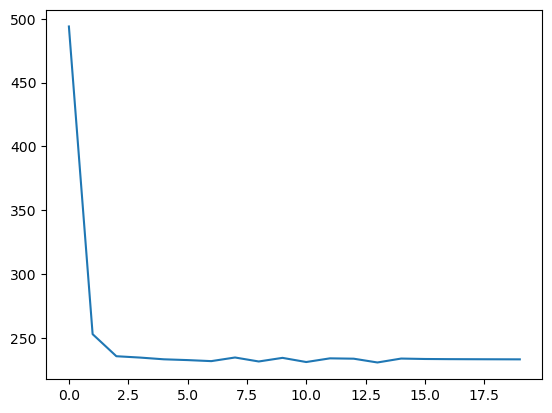

In [17]:
# Training through the entire training data set

n = len(trainX)
iterations = 20
losses = []
rnn = RNN(5, 5, 1, k)
for j in range(iterations):
    total_loss = 0
    for i in range(n - k):
        output, loss = train(trainX[i:i+k], trainY[i+k], k, nn.MSELoss(), 0.005, rnn)
        total_loss += loss
    losses.append(total_loss)

plt.figure()
plt.plot(np.arange(iterations), losses)
"""
Hurray! The loss plot looks pretty good, except that it starts to increase at about 50 iterations
so, 50 iterations is probably a good stopping point for the algorithm
[10, MSE, 0.005] -> 0.019 loss, Maybe I just got lucky with this?
[10, MSE, 0.05] -> 242.2 loss (Very bad), learning rate may still be too high in the inital run
[10, MSE, 0.001] -> 
"""

C:\Users\legoe\AppData\Local\Temp\ipykernel_7324\1998810907.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(hidden.reshape(1), torch.tensor(throughput, dtype=torch.float64).reshape(1))


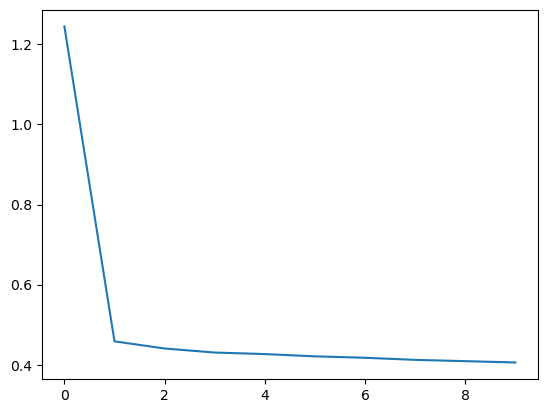

"\nWe're getting a loss of about ~0.4, whatever that means\nk = 5 looks pretty good for a learning rate of 0.0001\nk = 3 is even better\nk = 2 is not good\nk = 4 is also good, but not as much as 3\nGetting down to about 0.3 loss with k=3, LR=0.0003, iterations=300\n0.327 loss with k=3, LR=0.0003, iterations=1000\n"

In [19]:
"""
Add a get random batch method that returns a random interval from the training set of size k,
there should be n - k of them to choose from and I think this would give a much better training
data set than just iterating repeatedly over the dataset.
"""


# Writing out the full pipeline from start to finish

epochs = 1
iterations = 10
learning_rate = 0.0004
criterion = nn.MSELoss()
k = 3

# Setting up data
network_df = pd.read_csv("data\\network_anomaly_dataset\\network_dataset_labeled.csv")
X = np.array(filtered_df.filter(items=["throughput", "congestion", "packet_loss", "latency", "jitter"], axis=1))
y = np.array(filtered_df["throughput"])

tensorX = torch.tensor(X, dtype=torch.float64).detach().clone()
tensorY = torch.tensor(y, dtype=torch.float64).detach().clone()

trainX, testX, trainY, testY = train_test_split(tensorX, tensorY, test_size=0.2, shuffle=False)

for _ in range(epochs):
    losses = []
    net = RNN(5, 5, 1, k)
    for j in range(iterations):
        total_loss = 0
        for i in range(n - k):
            output, loss = train(trainX[i:i+k], trainY[i+k], k, criterion, learning_rate, net)
            total_loss += loss
        losses.append(total_loss / (n - k))
        
    plt.plot(np.arange(iterations), losses)
    plt.show()

"""
We're getting a loss of about ~0.4, whatever that means
k = 5 looks pretty good for a learning rate of 0.0001
k = 3 is even better
k = 2 is not good
k = 4 is also good, but not as much as 3
Getting down to about 0.3 loss with k=3, LR=0.0003, iterations=300
0.327 loss with k=3, LR=0.0003, iterations=1000
"""

In [20]:
print(min(losses))

0.40570341017408246


In [21]:
import random
"""
Making a random data loader to make the training of the model more efficient
"""

def load_data(trainX, trainY, k, n):
    i = random.choice(range(n - k))
    return trainX[i:i+k], trainY[i+k]

C:\Users\legoe\AppData\Local\Temp\ipykernel_7324\1998810907.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(hidden.reshape(1), torch.tensor(throughput, dtype=torch.float64).reshape(1))


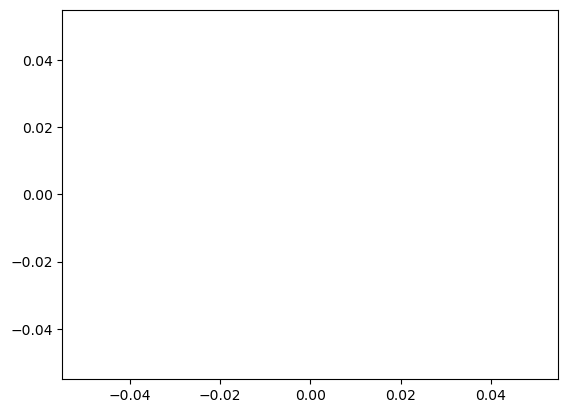

In [22]:
# Repeating the training process with the random data loader

epochs = 1
iterations = 10
learning_rate = 0.0001
criterion = nn.L1Loss()
k = 3

# Setting up data
network_df = pd.read_csv("data\\network_anomaly_dataset\\network_dataset_labeled.csv")
X = np.array(filtered_df.filter(items=["throughput", "congestion", "packet_loss", "latency", "jitter"], axis=1))
y = np.array(filtered_df["throughput"])

tensorX = torch.tensor(X, dtype=torch.float64).detach().clone()
tensorY = torch.tensor(y, dtype=torch.float64).detach().clone()

trainX, testX, trainY, testY = train_test_split(tensorX, tensorY, test_size=0.2, shuffle=False)

n = len(trainX)
for _ in range(epochs):
    losses = []
    net = RNN(5, 5, 1, k)
    total_loss = 0
    for j in range(iterations):
        tX, tY = load_data(trainX, trainY, k, n)
        output, loss = train(tX, tY, k, criterion, learning_rate, net)
        total_loss += loss
        if j % 1000 == 0:
            losses.append(total_loss / 1000)
            total_loss = 0
        
    plt.plot(losses[1:])
    plt.show()

# Shows the average loss up to that point

In [23]:
print(min(losses))
"""
Other things to try:
* Principal component analysis on the number of features in the input, I could potentially take it down from about 5 to 2
and save some computation time, but it would also allow me to increase the iterations about x3 with the same computation
time.
* Use a validation set to test for overfitting in the model and test its accuracy before the final test data set
* Try some different loss functions, the SmoothL1Loss or the L1Loss could be good bets
* Data normalization - this might be a big one along with the principal component analysis
- SmoothL1Loss gives a lower score (0.16), but that doesn't necessarily mean anything, the curve looks good though
- L1Loss decent error? (0.47), but I don't really know anything about that

After training:
Test the model by plot residuals over time for the testing set.
Are they close to the final outputted data? Is it close enough for my applications or does it fail badly?
""";

0.0027221877294959645


C:\Users\legoe\AppData\Local\Temp\ipykernel_7324\1998810907.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(hidden.reshape(1), torch.tensor(throughput, dtype=torch.float64).reshape(1))


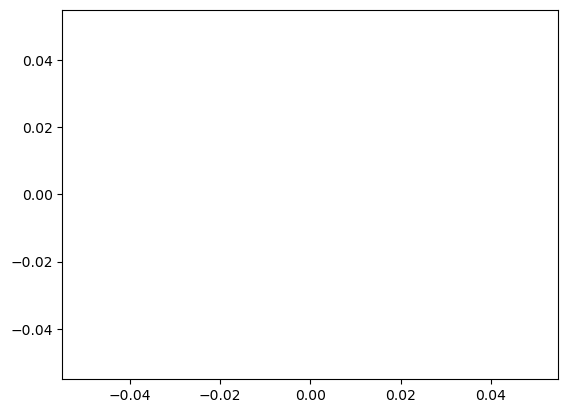

In [24]:
# Repeating the training process with the random data loader

epochs = 1
iterations = 1000
learning_rate = 0.0001
criterion = nn.MSELoss()
k = 3

# Setting up data
network_df = pd.read_csv("data\\network_anomaly_dataset\\network_dataset_labeled.csv")
X = np.array(filtered_df.filter(items=["throughput", "congestion", "packet_loss", "latency", "jitter"], axis=1))
y = np.array(filtered_df["throughput"])

tensorX = torch.tensor(X, dtype=torch.float64).detach().clone()
tensorY = torch.tensor(y, dtype=torch.float64).detach().clone()

trainX, testX, trainY, testY = train_test_split(tensorX, tensorY, test_size=0.2, shuffle=False)
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.3, shuffle=False)

losses = []
net = RNN(5, 5, 1, k)
total_loss = 0
n = len(trainX)
for j in range(iterations):
    tX, tY = load_data(trainX, trainY, k, n)
    output, loss = train(tX, tY, k, criterion, learning_rate, net)
    total_loss += loss
    if j % 1000 == 0:
        losses.append(total_loss / 1000)
        total_loss = 0
        
plt.plot(losses[1:])
plt.show()

In [25]:
# Using the validation set to test accuracy of the model by plotting the regression plot

print(k)
def predict(series, throughput, k, rnn):
    # Initialize hidden data
    hidden = net.init_hidden()

    # Feed forward through the model
    for i in range(k):
        hidden = net(series[i], hidden, i)

    return hidden

3


In [ ]:
# Running the prediction model on the validation set

actual = []  # Stores expected - actual results for all validation trials
n = len(validX)
for i in range(n - k):
    actual.append(predict(validX[i:i+k], validY[i+k], k, net).item())

plt.plot(actual, color="blue")
plt.plot(validY, color="orange")

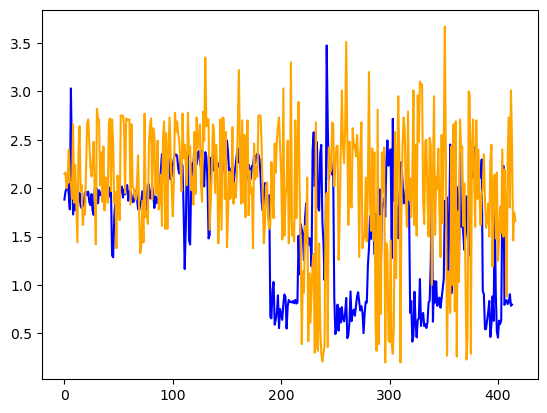

In [26]:
actual = []  # Stores expected - actual results for all validation trials
n = len(trainX)
for i in range(n - k):
    actual.append(predict(trainX[i:i+k], trainY[i+k], k, net).item())

plt.plot(actual, color="blue")
plt.plot(trainY, color="orange")

0.9110683752989223
0.5895503166708719


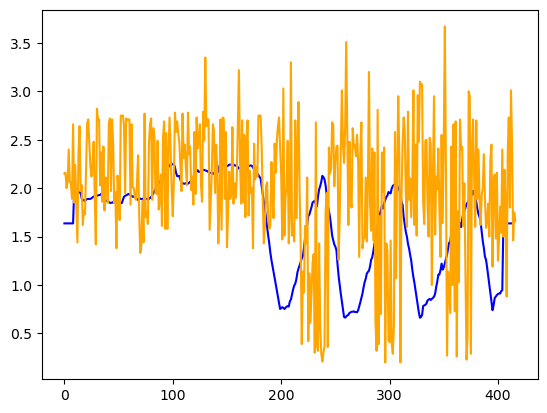

In [29]:
"""
Trying to use a moving average to get a more accurate prediction of the data that is also more stable
It is somewhat important to my application that the prediction values for this are stable so the UAVs don't make any
crazy movements
"""

def moving_average(arr, l):
    rtn = np.convolve(arr, np.ones(l)/l, mode="same")
    for i in range(int(l / 2)):
        rtn[i] = np.mean(arr)
        rtn[len(rtn) - i - 1] = np.mean(arr)
    return rtn

def RMSE(expected, actual, n):
    total = 0
    for i in range(n):
        total += (expected[i] - actual[i]) ** 2
    return np.sqrt(total / n).item()

averaged = moving_average(actual, 18)
plt.plot(averaged, color="blue")
plt.plot(trainY, color="orange")

print(RMSE(averaged, trainY, len(averaged)))
print(MAPE(averaged, trainY))

In [30]:
from sklearn.decomposition import PCA

"""
Time to try some PCA, perhaps with all the components of the original array
I also might try just normalizing each of the arrays prior to training on them, that could slightly improve results.
"""

# Regenerating data arrays
network_df = pd.read_csv("data\\network_anomaly_dataset\\network_dataset_labeled.csv")

# Running a normalization on the data first, then PCA
X = np.array([(filtered_df[x] - np.mean(filtered_df[x])) / np.std(filtered_df[x]) for x in ["throughput", "congestion", "packet_loss", "latency", "jitter"]])
X = X.T

pca_components = 3
pca = PCA(n_components=pca_components, svd_solver="full")
stdX = pca.fit_transform(X)
stdY = stdX[:,0]

tensorX_pca = torch.tensor(stdX, dtype=torch.float64).detach().clone()
tensorY_pca = torch.tensor(stdY, dtype=torch.float64).detach().clone()

# Splitting into test, train, and validation sets
trainX_pca, testX_pca, trainY_pca, testY_pca = train_test_split(tensorX_pca, tensorY_pca, test_size=0.2, shuffle=False)
trainX_pca, validX_pca, trainY_pca, validY_pca = train_test_split(trainX_pca, trainY_pca, test_size=0.2, shuffle=False)

In [ ]:
# Ok, the data from the PCA looks pretty good, time to run it through the model
# Don't forget to modify the testing and validation sets as well...

# Hyperparameters
criterion = nn.MSELoss()
learning_rate = 0.0001
iterations = 300000
k = 3

losses = []
net = RNN(pca_components, pca_components, 1, k)
total_loss = 0
n = len(trainX_pca)
for j in range(iterations):
    tX, tY = load_data(trainX_pca, trainY_pca, k, n)
    output, loss = train(tX, tY, k, criterion, learning_rate, net)
    total_loss += loss
    if j % 1000 == 0:
        losses.append(total_loss / 1000)
        total_loss = 0
        print(f'Iteration: {j / 1000}')
        
plt.plot(losses[1:])
plt.show()

Text(0.5, 1.0, 'MSE Loss vs. Iteration for RNN Model Training')

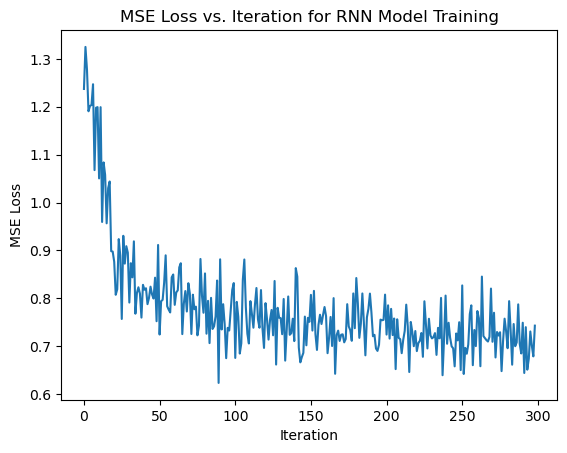

In [34]:
plt.plot(losses[1:])
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("MSE Loss vs. Iteration for RNN Model Training")

0.7579719355130751
1.2013281863676561


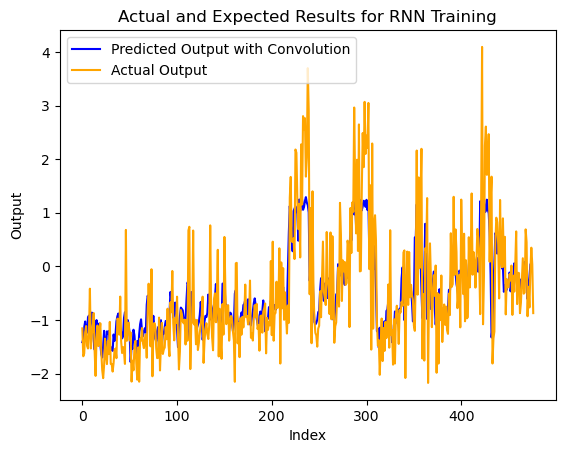

In [54]:
# Classifying training accuracy

actual = []  # Stores expected - actual results for all validation trials
n = len(trainX_pca)
for i in range(n - k):
    actual.append(predict(trainX_pca[i:i+k], trainY_pca[i+k], k, net).item())

plt.plot(actual, color="blue", label="Predicted Output with Convolution")
plt.title("Actual and Expected Results for RNN Training")
plt.xlabel("Index")
plt.ylabel("Output")
plt.plot(trainY_pca, color="orange", label="Actual Output")
plt.legend()

print(RMSE(moving_average(actual, 10), trainY_pca, len(actual)))
print(MAPE(moving_average(actual, 6), trainY_pca))

1.0400079584188275
4.225847990553381


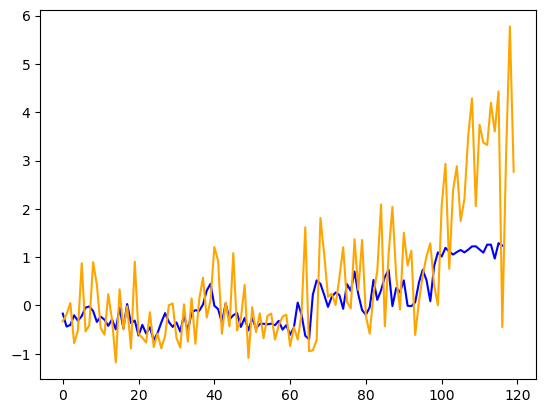

In [65]:
# Classifying validation accuracy

actual = []  # Stores expected - actual results for all validation trials
n = len(validX_pca)
for i in range(n - k):
    actual.append(predict(validX_pca[i:i+k], validY_pca[i+k], k, net).item())

plt.plot(actual, color="blue")
plt.plot(validY_pca, color="orange")

print(RMSE(moving_average(actual, 6), validY_pca, len(actual)))
print(MAPE(moving_average(actual, 6), validY_pca))

1.1266326146857302
2.3634136840859523
7.159867257104826
Improvement Over Baseline: 202.946001595734


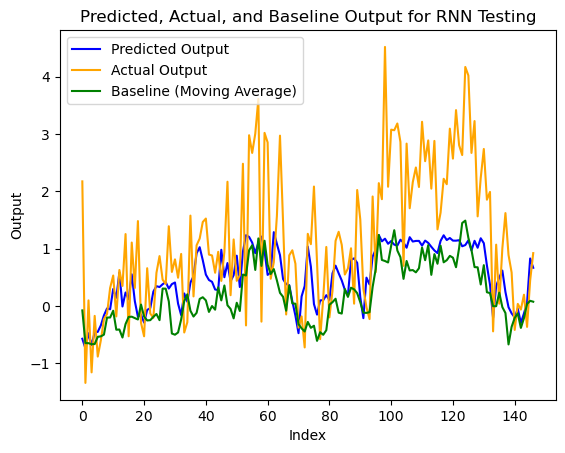

In [83]:
# Classifying final test accuracy

actual = []  # Stores expected - actual results for all validation trials
baseline = []
n = len(testX_pca)
for i in range(n - k):
    actual.append(predict(testX_pca[i:i+k], testY_pca[i+k], k, net).item())
    baseline.append(torch.mean(testX_pca[i:i+k]))

plt.plot(actual, color="blue", label="Predicted Output")
plt.xlabel("Index")
plt.ylabel("Output")
plt.title("Predicted, Actual, and Baseline Output for RNN Testing")
plt.plot(testY_pca[:n-k], color="orange", label="Actual Output")
plt.plot(baseline, color="green", label="Baseline (Moving Average)")
plt.legend()
print(RMSE(moving_average(actual, 6), testY_pca, len(actual)))
print(MAPE(moving_average(actual, 6), testY_pca))
print(MAPE(moving_average(actual, 6), baseline))
print(f'Improvement Over Baseline: {(MAPE(moving_average(actual, 6), baseline) / MAPE(moving_average(actual, 6), testY_pca) - 1) * 100}')

In [81]:
"""
Percent error is a better metric to compare across the instance of the PCA and the non-PCA results.
The PCA results look more correlated on the graph, and I just want to show that quantitatively.
"""

def MAPE(expected, actual):
    n = min(len(expected), len(actual))
    total = 0
    for i in range(n):
        total += 2 * np.abs((expected[i] - actual[i].item()) / (actual[i].item() + expected[i]))
    return (total / n).item()